### This example shows how a network can be built just through toolkit function calls. 
Eliminate the need to always use an EPANET formatted input file. 
This creates opportunities to use other sources of network data in one's code,
such as relational database files or GIS/CAD files.

Below is a schematic of the network to be built.

http://wateranalytics.org/EPANET/_example2.html

In [1]:
from epyt import epanet

# Create an empty INP file
testinp = 'TESTING.inp'
d = epanet(testinp, 'CREATE')

EPANET version 20200 loaded (EPyT version 1.0.5).
Input File TESTING.inp loaded successfully.



EPANET version 20200 loaded (EPyT version 1.0.5).
Input File TESTING.inp loaded successfully.



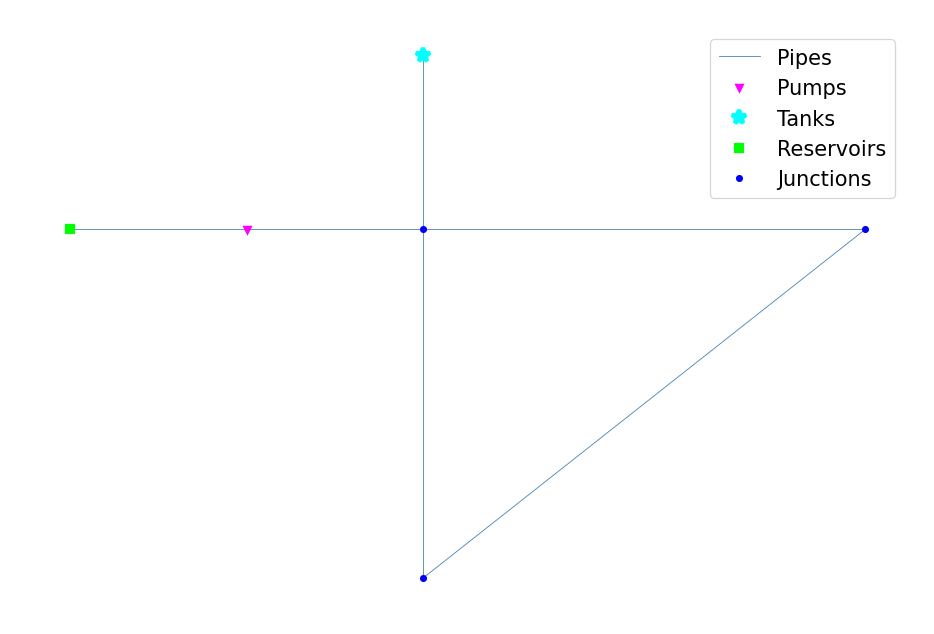

In [2]:
# Initialize epanet flow units 
d.initializeEPANET(d.ToolkitConstants.EN_GPM, d.ToolkitConstants.EN_HW)

# an elevation of 700 ft and a demand of 0
index = d.addNodeJunction('J1')
d.setNodeJunctionData(index, 700, 0, '')
d.setNodeCoordinates(index, [0, 0])

# Add the remaining two junctions with elevations of
# 710 ft and demands of 250 and 500 gpm, respectively
index = d.addNodeJunction('J2')
d.setNodeJunctionData(index, 710, 250, '')
d.setNodeCoordinates(index, [0, -100])

index = d.addNodeJunction('J3')
d.setNodeJunctionData(index, 710, 500, '')
d.setNodeCoordinates(index, [100, 0])

# Add the reservoir at an elevation of 650 ft
index = d.addNodeReservoir('R1')
d.setNodeElevations(index, 650)
d.setNodeCoordinates(index, [-80, 0])

# Add the tank node at elevation of 850 ft, initial water level
# at 120 ft, minimum level at 100 ft, maximum level at 150 ft
# and a diameter of 50.5 ft
index = d.addNodeTank('T1')  #bug check
d.setNodeTankData(index, 850, 120, 100, 150, 50.5, 0, '')
d.setNodeCoordinates(index, [0, 50])

# Add the pipes to the project, setting their length,   
# diameter, and roughness values
index = d.addLinkPipe('P1', 'J1', 'J2')
d.setLinkPipeData(index, 10560, 12, 100, 0)
index = d.addLinkPipe('P2', 'J1', 'T1')
d.setLinkPipeData(index, 5280, 14, 100, 0)
index = d.addLinkPipe('P3', 'J1', 'J3')
d.setLinkPipeData(index, 5280, 14, 100, 0)
index = d.addLinkPipe('P4', 'J2', 'J3')
d.setLinkPipeData(index, 5280, 14, 100, 0)
 
# Add a pump to the project
index = d.addLinkPump('PUMP', 'R1', 'J1')
 
# Create a single point head curve (index = 1) and
# assign it to the pump
d.addCurve('C1')
d.setCurveValue(1, 1, [1500, 250])
d.setLinkPumpHCurve(index, 1)
 
# Save the project for future use
d.saveInputFile(testinp)
d = epanet(testinp)
d.plot()

d.deleteProject()